Accuracy: 0.8588588588588588

Classification Report:
                          precision    recall  f1-score   support

      Disease Outbreaks       1.00      0.49      0.66        49
    Healthcare Policies       1.00      0.05      0.10        20
Healthcare Technologies       0.95      0.28      0.43       250
     Medical Treatments       1.00      0.68      0.81       184
                  Other       0.84      1.00      0.91      1495

               accuracy                           0.86      1998
              macro avg       0.96      0.50      0.58      1998
           weighted avg       0.88      0.86      0.83      1998



C:\Users\priya\AppData\Local\Temp\ipykernel_4772\4073966008.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


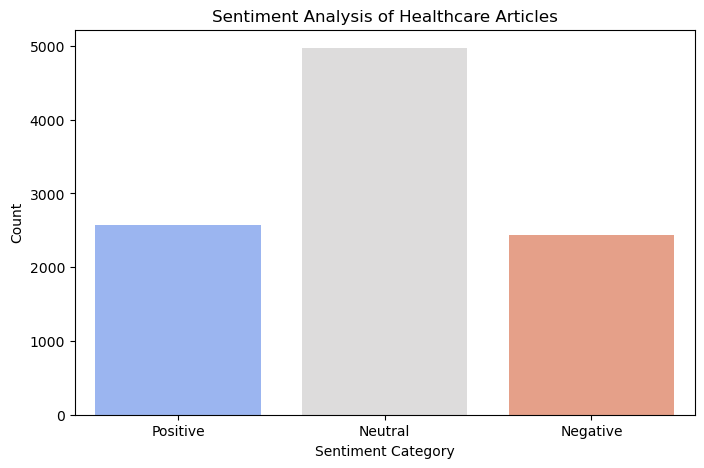

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the dataset
df = pd.read_csv("cleaned_healthcare_data.csv")

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'http\S+', '', str(text))  # Remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    return text.lower()

# Apply text cleaning
df['cleaned_text'] = df['title'].astype(str).apply(clean_text)

# Define X (features) and y (target)
X = df['cleaned_text']
y = df['topic']  # Assuming 'topic' column is the category

# Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print model accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "Positive"
    elif score['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['title'].astype(str).apply(get_sentiment)

# Plot Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title("Sentiment Analysis of Healthcare Articles")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()